Automatically created module for IPython interactive environment
training score : 0.995 (multinomial)
training score : 0.976 (ovr)


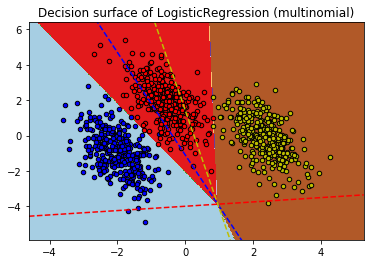

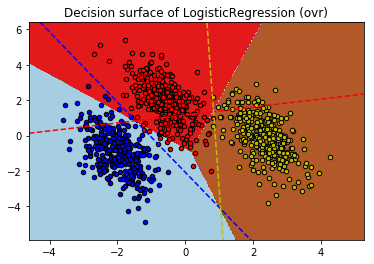

In [1]:
print(__doc__)
# Authors: Tom Dupre la Tour <tom.dupre-la-tour@m4x.org>
# License: BSD 3 clause

import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.linear_model import LogisticRegression

# make 3-class dataset for classification
centers = [[-5, 0], [0, 1.5], [5, -1]]
X, y = make_blobs(n_samples=1000, centers=centers, random_state=40)
transformation = [[0.4, 0.2], [-0.4, 1.2]]
X = np.dot(X, transformation)

for multi_class in ('multinomial', 'ovr'):
    clf = LogisticRegression(solver='sag', max_iter=100, random_state=42,
                             multi_class=multi_class).fit(X, y)

    # print the training scores
    print("training score : %.3f (%s)" % (clf.score(X, y), multi_class))

    # create a mesh to plot in
    h = .02  # step size in the mesh
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, x_max]x[y_min, y_max].
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.figure()
    plt.contourf(xx, yy, Z, cmap=plt.cm.Paired)
    plt.title("Decision surface of LogisticRegression (%s)" % multi_class)
    plt.axis('tight')

    # Plot also the training points
    colors = "bry"
    for i, color in zip(clf.classes_, colors):
        idx = np.where(y == i)
        plt.scatter(X[idx, 0], X[idx, 1], c=color, cmap=plt.cm.Paired,
                    edgecolor='black', s=20)

    # Plot the three one-against-all classifiers
    xmin, xmax = plt.xlim()
    ymin, ymax = plt.ylim()
    coef = clf.coef_
    intercept = clf.intercept_

    def plot_hyperplane(c, color):
        def line(x0):
            return (-(x0 * coef[c, 0]) - intercept[c]) / coef[c, 1]
        plt.plot([xmin, xmax], [line(xmin), line(xmax)],
                 ls="--", color=color)

    for i, color in zip(clf.classes_, colors):
        plot_hyperplane(i, color)

plt.show()


In [2]:
y

array([0, 0, 0, 2, 1, 1, 0, 0, 0, 1, 2, 2, 2, 1, 1, 1, 1, 2, 0, 2, 0, 1, 0,
       1, 1, 2, 0, 1, 1, 1, 2, 0, 2, 0, 2, 1, 2, 2, 0, 0, 1, 0, 0, 0, 1, 2,
       0, 0, 0, 2, 0, 0, 0, 1, 1, 0, 1, 2, 0, 1, 2, 1, 2, 2, 0, 1, 1, 0, 1,
       0, 1, 2, 1, 1, 0, 2, 1, 2, 0, 0, 1, 1, 2, 0, 0, 2, 1, 2, 1, 2, 2, 2,
       1, 1, 2, 2, 0, 0, 0, 0, 2, 2, 0, 1, 0, 0, 1, 2, 2, 1, 2, 1, 0, 1, 1,
       2, 0, 2, 1, 1, 0, 1, 2, 2, 2, 0, 0, 1, 0, 2, 0, 2, 2, 1, 2, 1, 0, 1,
       2, 2, 2, 2, 2, 1, 1, 1, 1, 2, 2, 2, 1, 2, 1, 0, 0, 1, 1, 1, 1, 1, 2,
       0, 0, 1, 2, 2, 2, 0, 1, 2, 1, 1, 1, 0, 1, 2, 0, 2, 2, 0, 2, 2, 1, 1,
       2, 0, 1, 0, 0, 2, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 2, 2, 1, 0, 0, 1,
       0, 1, 1, 2, 0, 0, 0, 1, 2, 1, 2, 1, 2, 0, 2, 1, 1, 0, 2, 2, 1, 1, 1,
       0, 0, 2, 2, 2, 0, 2, 2, 2, 2, 1, 0, 2, 2, 1, 0, 2, 2, 0, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 2, 0, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 2, 0, 1, 2, 0,
       0, 2, 2, 2, 0, 2, 0, 0, 1, 1, 1, 2, 1, 0, 2, 0, 0, 0, 2, 2, 0, 2, 2,
       1, 2,